# Машинное обучение для предсказания цены Китайских автомобилей

## Для чего это нужно?

Данная модель может быть полезна как для покупателей авто, так и для людей занимающихся перепродажей професисонально. Обычные покупатели могут примерно понять ценовой сегмент автомобиля, если у них есть особые потребности по конфигурации авто. Для ресселеров эта модель будет полезна тем, что она позволяет понять примерную рыночную цену авто исходя из его характеристик. Это поможет ускорить бизнес процессы, а также сократить затраты на оценивание стоимости автомобиля.

### Подгрузим библиотеки

In [124]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(422)

### Загрузим таблицу после EDA

In [125]:
df = pd.read_csv('df_for_ML_upd.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df

,Unnamed: 0.1,Цена,Год,Километраж,Количество дверей,Количество мест,Длина,Ширина,Высота,Максимальная скорость,...,Тип привода_задний,Тип привода_передний,Тип привода_полный,Тип двигателя_Электро,Тип двигателя_бензиновый,Тип двигателя_гибридный,Тип двигателя_дизельный,Объём,Удельная мощность автомобиля,Плотность пассажирского пространства
0,0,3440000.0,2023.0,1000.0,5.0,5.0,4865.0,1948.0,1695.0,200.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,16.063549,14.069120,0.311264
1,12,4060000.0,2023.0,1000.0,5.0,5.0,4770.0,1895.0,1689.0,215.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,15.267124,15.589052,0.327501
2,13,3730000.0,2023.0,1000.0,5.0,5.0,4865.0,1948.0,1695.0,200.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,16.063549,14.069120,0.311264
3,15,4190000.0,2023.0,1000.0,5.0,5.0,4775.0,1920.0,1671.0,200.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,15.319728,16.253552,0.326377
4,16,1650000.0,2020.0,36000.0,5.0,5.0,4318.0,1831.0,1662.0,174.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,13.140201,9.284485,0.380512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2242,2320000.0,2022.0,30000.0,5.0,5.0,4620.0,1890.0,1780.0,195.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,15.542604,13.575589,0.321696
2042,2243,1580000.0,2021.0,17000.0,5.0,5.0,4350.0,1810.0,1615.0,195.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12.715703,13.919797,0.393215
2043,2244,1430000.0,2021.0,41000.0,5.0,5.0,4437.0,1850.0,1625.0,190.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,13.338731,12.669871,0.374848
2044,2245,1490000.0,2021.0,16000.0,5.0,5.0,4350.0,1810.0,1615.0,195.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12.715703,13.919797,0.393215


### Разобьем выборку на тестовую и тренировочную

In [126]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.2)
y_train, y_test = df_train['Цена'].to_numpy(), df_test['Цена'].to_numpy()
x_train, x_test = df_train.drop(['Цена'], axis=1).to_numpy(), df_test.drop(['Цена'], axis=1).to_numpy()
feature_names = df_train.drop('Цена', axis=1).columns
feature_names

Index(['Unnamed: 0.1', 'Год', 'Километраж', 'Количество дверей',
       'Количество мест', 'Длина', 'Ширина', 'Высота', 'Максимальная скорость',
       'Разгон до 100', 'Лошадиные силы', 'Обороты в минуту',
       'Город_ekaterinburg', 'Город_moskva', 'Город_novosibirsk',
       'Город_rostov-na-donu', 'Город_sankt-peterburg', 'Город_vladivostok',
       'Класс автомобиля_B', 'Класс автомобиля_C', 'Класс автомобиля_D',
       'Класс автомобиля_E', 'Класс автомобиля_F', 'Класс автомобиля_J',
       'Класс автомобиля_M', 'Коробка передач_Автомат',
       'Коробка передач_Вариатор', 'Коробка передач_Механика',
       'Коробка передач_Робот', 'Тип привода_задний', 'Тип привода_передний',
       'Тип привода_полный', 'Тип двигателя_Электро',
       'Тип двигателя_бензиновый', 'Тип двигателя_гибридный',
       'Тип двигателя_дизельный', 'Объём', 'Удельная мощность автомобиля',
       'Плотность пассажирского пространства'],
      dtype='object')

### Подготовим функции для оценки качества моделей

Функция для визуализации: с помощью нее можем увидеть как модель предсказывает цену как на тестовой выборке, так и на тренировочной

In [127]:
def plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat):
    """
        Рисует картинку для прогнозов регрессии 
    """
    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.ticklabel_format(style = 'plain')
    plt.scatter(y_train, y_train_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Train set', fontsize=20)

    plt.subplot(122)
    plt.ticklabel_format(style = 'plain')
    plt.scatter(y_test, y_test_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Test set', fontsize=20)
    pass

Функция с метриками: берем MAE и RMSE, чтобы понимать насколько мы ошибаемся, а также берем MAPE, чтобы понимать процент на сколько мы ошибаемся

In [128]:
from sklearn import metrics

def rmse(test, pred):
    print('MAE:', "%.4f" % metrics.mean_absolute_error(test, pred))
    print('RMSE:', "%.4f" % np.sqrt(metrics.mean_squared_error(test, pred)))
    print('MAPE:', "%.4f" % metrics.mean_absolute_percentage_error(test,pred))


## Модели

Проверим работоспособность функций на наивном прогнозе средней

In [129]:
y_mean = np.mean(y_train)
y_pred_naive = np.ones(len(y_test)) * y_mean
rmse(y_test, y_pred_naive)

MAE: 758623.4122
RMSE: 977885.3602
MAPE: 0.3750


### Обучим модель - линейная регрессия

In [130]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_train_linear = linear_model.predict(x_train)
y_pred_test_linear = linear_model.predict(x_test)

Оценим модель

Test:
MAE: 242333.5211
RMSE: 342213.0509
MAPE: 0.1134
Train:
MAE: 232393.3229
RMSE: 330887.3645
MAPE: 0.1175


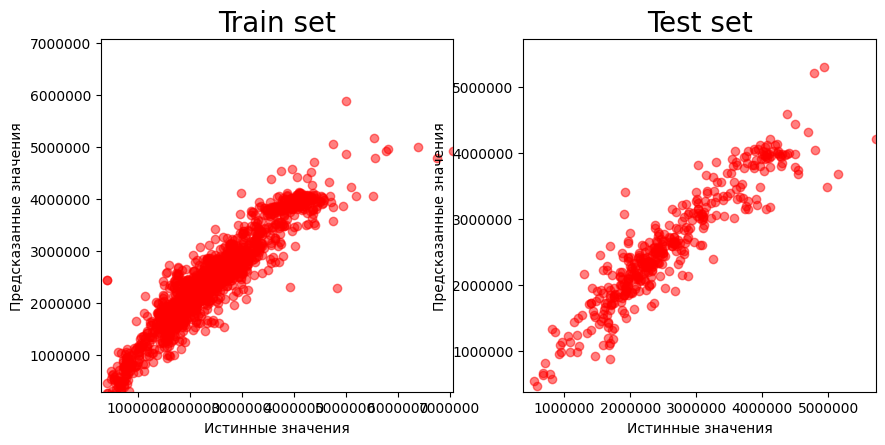

In [131]:
print("Test:")
rmse(y_test, y_pred_test_linear)
print("Train:")
rmse(y_train, y_pred_train_linear)
plot_yreal_ypred(y_test, y_train, y_pred_test_linear, y_pred_train_linear)

После обучения мы обнаружили, что у нас есть пробел в данных в ценовом сегменте от 5 миллионов до 6 миллионов - всего 10 машин. Во время сбора выборка была весьма репрезентативная, изначально мы имели почти 3000 китайских авто. Судя по всему на рынке Китайского автопрома в России нет машин в данном ценовом сегменте. В связи с этим, очеидно, что все модели будут плохо предсказывать цену от 5 до 6 миллионов

### Обучим другую модель - Ridge

In [132]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=1)
model_ridge.fit(x_train, y_train)
y_pred_train_ridge = model_ridge.predict(x_train)
y_pred_test_ridge = model_ridge.predict(x_test)

Оценим

Test:
MAE: 242531.7928
RMSE: 346048.9737
MAPE: 0.1136
Train:
MAE: 232865.6624
RMSE: 332047.2548
MAPE: 0.1177


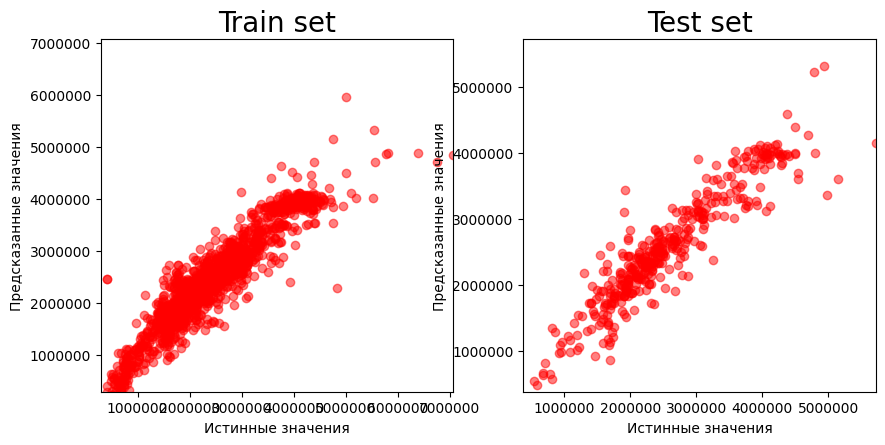

In [133]:
print("Test:")
rmse(y_test, y_pred_test_ridge)
print("Train:")
rmse(y_train, y_pred_train_ridge)
plot_yreal_ypred(y_test, y_train, y_pred_test_ridge, y_pred_train_ridge)

Переберем лямбда параметр для Ridge и обучим с новым параметром

Best alpha = 0.0100


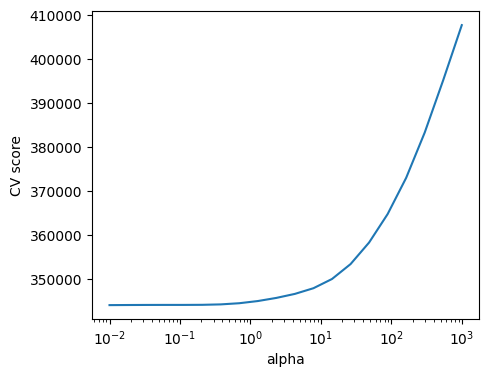

In [134]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(
    Ridge(), [{"alpha": alphas}], 
    scoring="neg_root_mean_squared_error", cv=10
)
searcher.fit(x_train, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.figure(figsize=(5,4))
plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score");

In [135]:
model_ridge_b = Ridge(alpha=best_alpha)
model_ridge_b.fit(x_train, y_train)
y_pred_train_ridge_b = model_ridge_b.predict(x_train)
y_pred_test_ridge_b = model_ridge_b.predict(x_test)

Test:
MAE: 242052.9781
RMSE: 342914.6170
MAPE: 0.1133
Train:
MAE: 232351.4344
RMSE: 331022.0370
MAPE: 0.1172


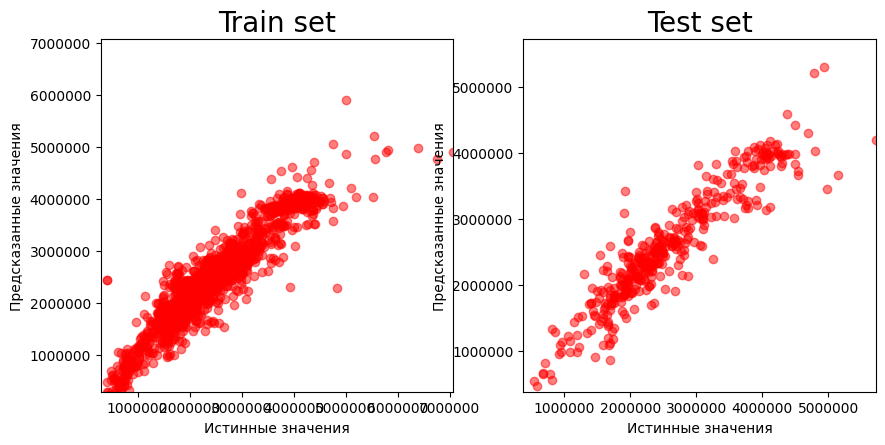

In [136]:
print("Test:")
rmse(y_test, y_pred_test_ridge_b)
print("Train:")
rmse(y_train, y_pred_train_ridge_b)
plot_yreal_ypred(y_test, y_train, y_pred_test_ridge_b, y_pred_train_ridge_b)

Получили +- то же качество модели, параметр не сильно изменил ситуацию

### Обучим модель - Lasso

In [137]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=1)
model_lasso.fit(x_train, y_train)
y_pred_train_lasso = model_lasso.predict(x_train)
y_pred_test_lasso = model_lasso.predict(x_test)

/Users/vorobevgleb/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.100e+13, tolerance: 1.473e+11
  model = cd_fast.enet_coordinate_descent(


Оценим

Test:
MAE: 243812.4657
RMSE: 348978.6332
MAPE: 0.1137
Train:
MAE: 233339.0170
RMSE: 333489.7526
MAPE: 0.1174


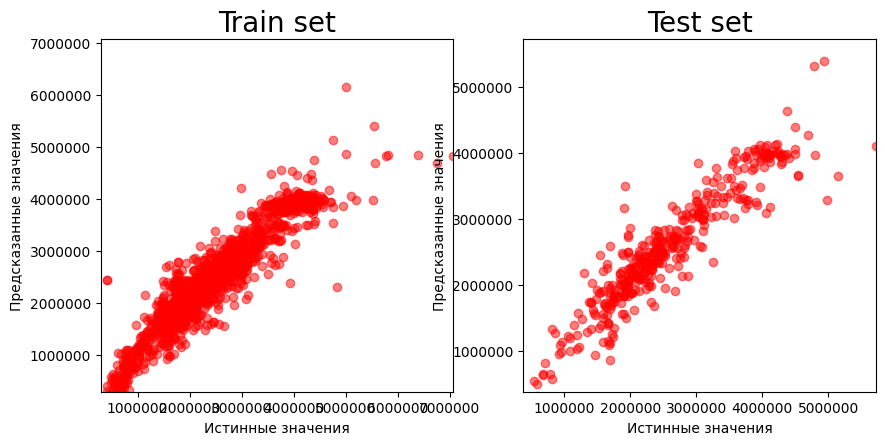

In [138]:
print("Test:")
rmse(y_test, y_pred_test_lasso)
print("Train:")
rmse(y_train, y_pred_train_lasso)
plot_yreal_ypred(y_test, y_train, y_pred_test_lasso, y_pred_train_lasso)

Переберем лямбда параметр для Lasso и обучим модель

/Users/vorobevgleb/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.214e+13, tolerance: 1.339e+11
  model = cd_fast.enet_coordinate_descent(
/Users/vorobevgleb/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.112e+13, tolerance: 1.337e+11
  model = cd_fast.enet_coordinate_descent(
/Users/vorobevgleb/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

Best alpha = 88.5867


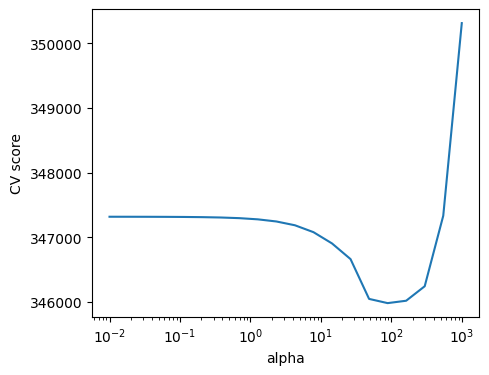

In [139]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(
    Lasso(), [{"alpha": alphas}], 
    scoring="neg_root_mean_squared_error", cv=10
)
searcher.fit(x_train, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.figure(figsize=(5,4))
plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score");

Обучим

In [140]:
model_lasso_b = Lasso(alpha=best_alpha)
model_lasso_b.fit(x_train, y_train)
y_pred_train_lasso_b = model_lasso_b.predict(x_train)
y_pred_test_lasso_b = model_lasso_b.predict(x_test)

/Users/vorobevgleb/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.144e+13, tolerance: 1.473e+11
  model = cd_fast.enet_coordinate_descent(


Test:
MAE: 243293.8085
RMSE: 347582.5051
MAPE: 0.1137
Train:
MAE: 232878.5049
RMSE: 332824.6840
MAPE: 0.1179


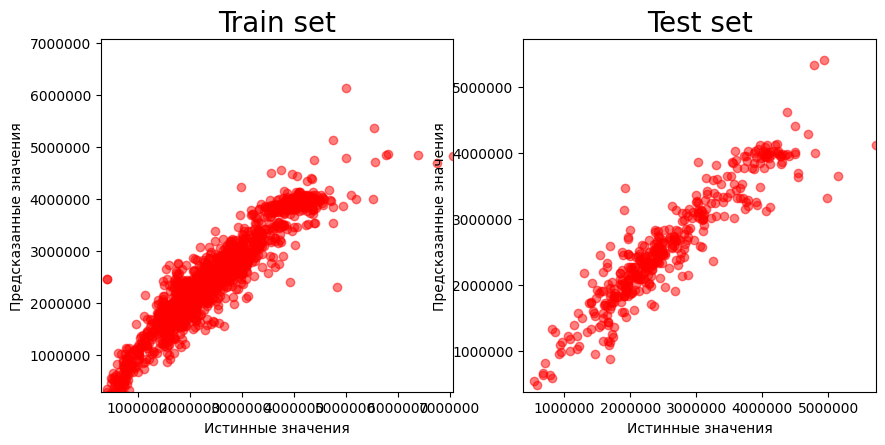

In [141]:
print("Test:")
rmse(y_test, y_pred_test_lasso_b)
print("Train:")
rmse(y_train, y_pred_train_lasso_b)
plot_yreal_ypred(y_test, y_train, y_pred_test_lasso_b, y_pred_train_lasso_b)

## Вывод

Все модели имеют схожие результаты ошибок, особой разницы между ними нет, данная разница меняется от одного seed к другому. К сожалению, только на этапе ML была обнражуена такая дыра в данных. Однако, частично это будет отвечать реалиям рынка, так как в сегменте действительно мало машин в диапозоне цены от 5 до 6 миллионов рублей. В среднем предсказанная цена отличается на 11-12% от реальной цены, то есть 230-250 тысяч рублей. Это достаточно хороший показатель, так целью модели ставилось примерное предсказывание цены, для каких-то последующих маниплуяций. В любом случае, когда дело доходит до непосредственно взаимодействия с продавцом, цена может измениться, как в меньшую так и в большую сторону. Поэтому ошибка в 11% позволительна.